In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS
import scipy as sp
from joblib import dump,load
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV, LassoCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV
import statistics as sta
import datetime
from datetime import datetime
from datetime import date
import pandas as pd
import  matplotlib.animation as animation
from IPython.display import HTML
import seaborn as sns
import plotly.express as px
import cufflinks as cf
cf.go_offline()
from dotenv import load_dotenv
import os

In [29]:
load_dotenv()

sheet_url = f"https://docs.google.com/spreadsheets/d/{os.getenv('key')}/export?gid=1390987019&format=csv"

df = pd.read_csv(sheet_url)



In [30]:

df['Date Time'] = pd.to_datetime(df['Date Time'])
df['month'] = pd.DatetimeIndex(df['Date Time']).month

df = df.drop('Date', axis='columns')
df = df.drop('Time', axis='columns')

In [31]:
df.head()

,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Wind Direction,Weather Type,Weather Sub-type,Date Time,Avg T,month
0,31.16,34.93,59,1014,7.72,60,Clouds,scattered clouds,2022-07-23 17:39:45,33.045,7
1,30.65,34.12,60,1014,3.13,52,Clouds,few clouds,2022-07-23 18:07:18,32.385,7
2,30.80,33.96,58,1014,3.09,30,Clouds,few clouds,2022-07-23 18:37:19,32.380,7
3,25.92,26.37,69,1015,4.40,27,Clouds,overcast clouds,2022-07-23 19:07:18,26.145,7
4,29.80,32.84,62,1014,4.12,30,Clouds,few clouds,2022-07-23 19:37:18,31.320,7


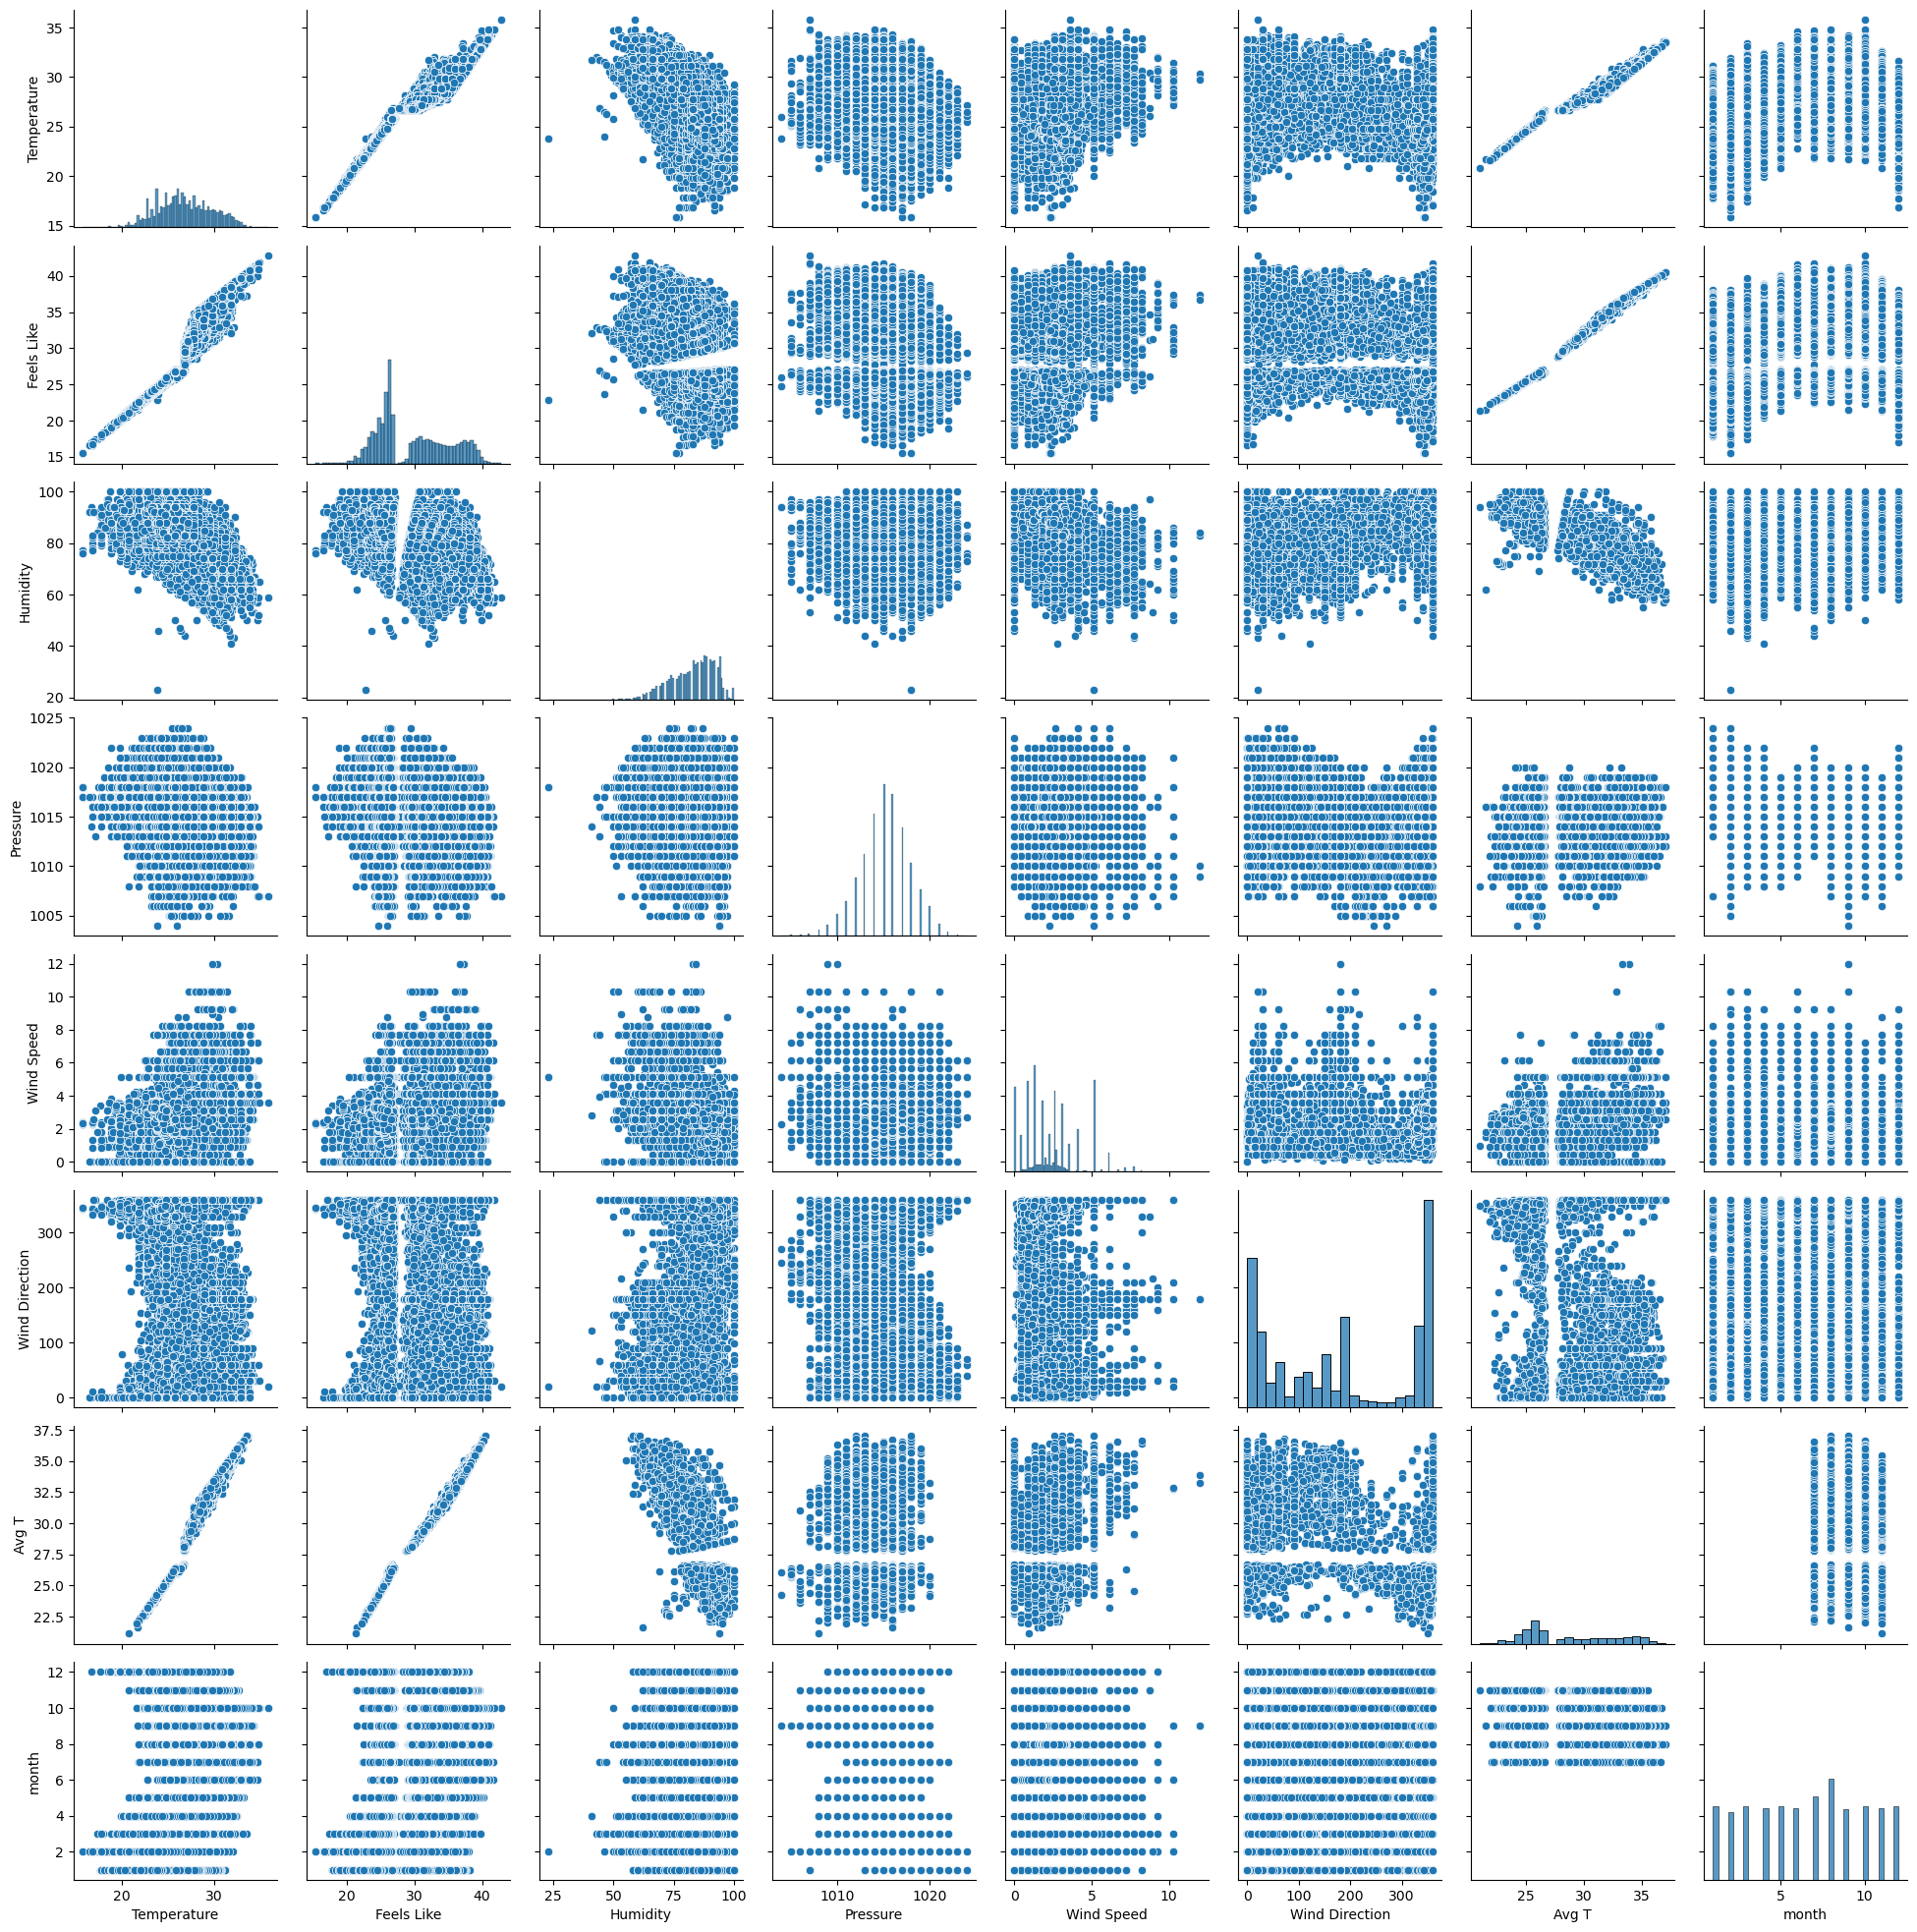

In [32]:
sns.pairplot(df)

In [48]:
df2 = df[['Temperature','month']]

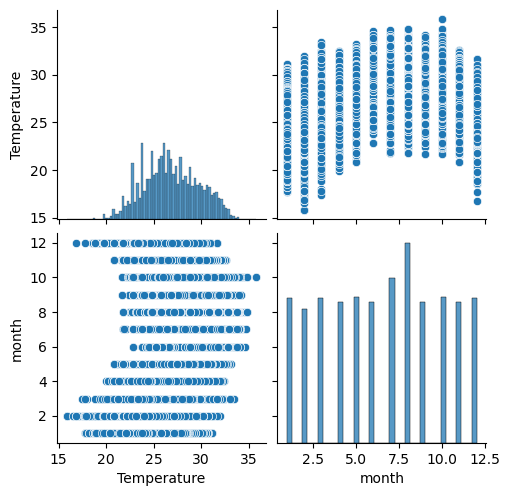

In [49]:
sns.pairplot(df2)

In [50]:
X = df2.drop('Temperature', axis=1)
y = df2['Temperature']

In [51]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.1,
                                       random_state=101)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [53]:
model = ElasticNet(max_iter=1000)

In [54]:
param_grid = {'alpha':[0.01,0.1,0.15,0.175,0.195,0.199,0.2],
              'l1_ratio':[.99,0.991,0.9915,0.9975,0.995,0.999,1]}

In [55]:
grid_model = GridSearchCV(estimator=model, 
                          param_grid=param_grid, 
                          scoring='neg_mean_squared_error', 
                          cv=5, verbose=2)

grid_model.fit(X_train,y_train)

grid_model.best_estimator_

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.0s
[CV] END ..........................alpha=0.01, l1_ratio=0.99; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   0.0s
[CV] END .........................alpha=0.01, l1_ratio=0.991; total time=   0.0s
[CV] END ........................alpha=0.01, l1_ratio=0.9915; total time=   0.0s
[CV] END ........................alpha=0.01, l1

ElasticNet(alpha=0.01, l1_ratio=0.99)

In [56]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.99}

In [57]:
y_pred = grid_model.predict(X_test)

In [58]:
MAE = mean_absolute_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print(MAE)
print(RMSE)

2.386330464795754
2.8848837927336763


c:\Users\aguil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='Temperature'>

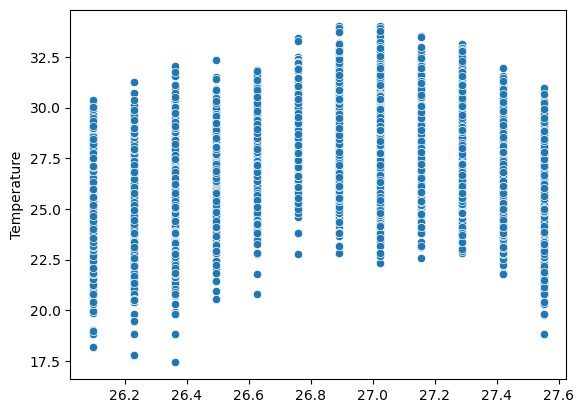

In [59]:
sns.scatterplot(y_pred,y_test)